# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [4]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [5]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.


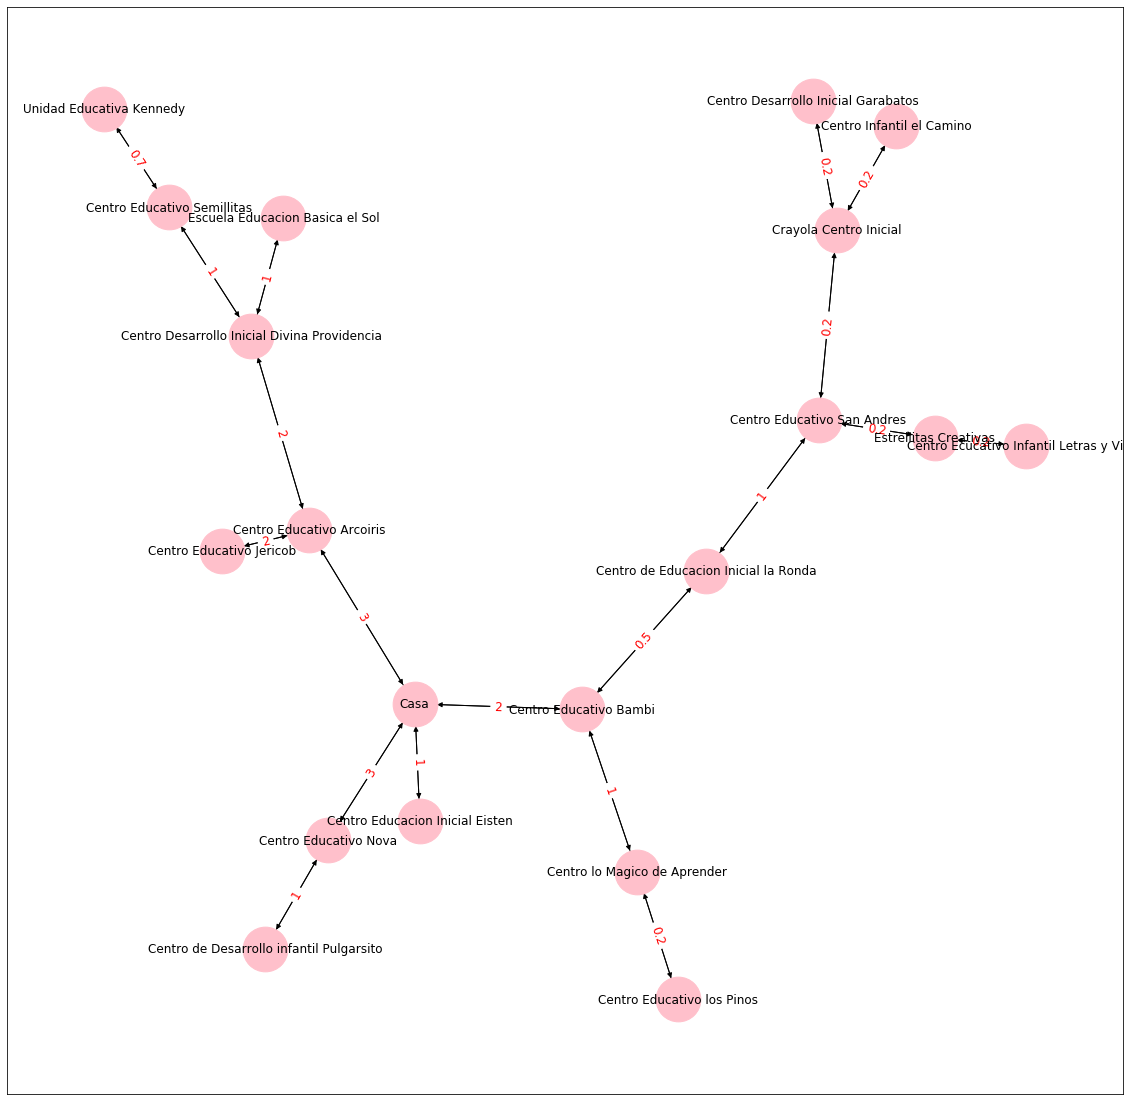

In [6]:
# Implementar
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

connections = {
        'Casa': {'Centro Educacion Inicial Eisten': 1, 'Centro Educativo Arcoiris': 3, 'Centro Educativo Bambi': 2, 
                 'Centro Educativo Nova': 3},

        'Centro Educacion Inicial Eisten': {'Casa': 1},

        'Centro Educativo Arcoiris': {'Centro Educativo Jericob': 2, 'Centro Desarrollo Inicial Divina Providencia': 2, 'Casa': 3},
        'Centro Educativo Jericob': {'Centro Educativo Arcoiris':2},
        'Centro Desarrollo Inicial Divina Providencia': {'Escuela Educacion Basica el Sol': 1, 'Centro Educativo Semillitas':1, 'Centro Educativo Arcoiris':2},
        'Centro Educativo Semillitas': {'Unidad Educativa Kennedy': 0.7, 'Centro Desarrollo Inicial Divina Providencia':1},
        'Unidad Educativa Kennedy': {'Centro Educativo Semillitas': 0.7},
        'Escuela Educacion Basica el Sol': {'Centro Desarrollo Inicial Divina Providencia':1},

        'Centro Educativo Nova': {'Centro de Desarrollo infantil Pulgarsito': 1, 'Casa': 3},
        'Centro de Desarrollo infantil Pulgarsito': {'Centro Educativo Nova': 1},

        'Centro Educativo Bambi': {'Centro lo Magico de Aprender': 1, 'Centro de Educacion Inicial la Ronda': 0.5, 'Casa': 2},
        'Centro lo Magico de Aprender': {'Centro Educativo los Pinos': 0.2, 'Centro Educativo Bambi': 1},
        'Centro Educativo los Pinos': {'Centro lo Magico de Aprender':0.2},

        'Centro de Educacion Inicial la Ronda': {'Centro Educativo San Andres': 1, 'Centro Educativo Bambi': 0.5},
        'Centro Educativo San Andres': {'Estrellitas Creativas':0.2, 'Crayola Centro Inicial': 0.2, 'Centro de Educacion Inicial la Ronda':1},
        'Estrellitas Creativas': {'Centro Ecucativo Infantil Letras y Vidas': 0.2, 'Centro Educativo San Andres':0.2},
        'Centro Ecucativo Infantil Letras y Vidas': {'Estrellitas Creativas':0.2},
        'Crayola Centro Inicial': {'Centro Infantil el Camino': 0.2, 'Centro Desarrollo Inicial Garabatos': 0.2, 'Centro Educativo San Andres':0.2},
        'Centro Infantil el Camino': {'Crayola Centro Inicial':0.2},
        'Centro Desarrollo Inicial Garabatos': {'Crayola Centro Inicial':0.2}

}

def grafico(diccionario):
    g = nx.DiGraph()
    g.add_nodes_from(diccionario)
    for valor, valores in diccionario.items():
        for a in valores:
            g.add_edge(valor,a,size=250,length=str(valores[a]))
    
    posicion = nx.spring_layout(g)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(g,'length')
    nx.draw_networkx(g, posicion, node_color = 'pink', with_labels = True, node_size=2000)
    nx.draw_networkx_edge_labels(g,posicion,edge_labels=labels,font_color='red',font_size=12)
    plt.show()
      
grafico(connections)

In [3]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None):  # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child):  # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self

    def equal(self, node):  # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list):  # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self):  # Igual al toString Java
        return str(self.data)


connections = {
        'Casa': {'Unidad Educativa del Milenio UEM SAYAUSÍ ': 1.7, 'Unidad Educativa Alborada': 1.75, 
                 'Unidad Educativa San Joaquin': 3.8},

        'Unidad Educativa del Milenio UEM SAYAUSI': {'Casa': 1.7},

        'Unidad Educativa Alborada': {'Unidad educativo Pasos': 4, 'Unidad Educativa  Las Pencas': 6.2, 'Casa': 7.2},
        'Unidad educativo Pasos': {'Unidad Educativa Alborada':4},
        'Unidad Educativa  Las Pencas': {'Colegio Ciudad de Cuenca': 1.6, 'Unidad Educativa Republica del Ecuador':2.4},
        'Unidad Educativa Republica del Ecuador': {'Escuela UNEDID': 1.9, 'Colegio Antonio Avila':0.8, 
                                                   'Uniadad Educativa Victor Gerardo Aguilar':0.6},
        'Escuela UNEDID': {'Escuela 12 de Abril': 0.9},
        'Colegio Antonio Avila': {'Colegio Miguel Merchan':1.5},

        'Uniadad Educativa Victor Gerardo Aguilar': {'Escuela Tres de noviembre': 1,
                                                     'Falcutad de Ciencias de la Hospitalidad':
                                                     1.2, "Federico Proaño":1.5, 'Casa':7.7},

}


def Compare(node):
    return node.cost

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def buscar_profundidad(init_node, solution, visited, diccionario, costo, grafo):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        init_node.cost=round(costo,2)
        grafo.add_node(init_node.data,color='red')
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in diccionario[node_data]:
            child = Node(node)
            cost = diccionario[node_data][node]
            child.cost=round(cost,2)
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        for son in init_node.child: # Recorrer los nodos hijos
            if not son.data in visited: # No deben estar en los nodos visitados
                costo=costo+son.cost
                grafo.add_edge(init_node.data,son,label=costo)
                Solution = buscar_profundidad(son, solution, visited, diccionario, costo, grafo)
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = 'Casa' # Creamos un estado inicial
solution = 'Unidad Educativa del Milenio UEM SAYAUSI' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None
visited = []
init_node = Node(init_state)
costo = 0
node = buscar_profundidad(init_node, solution, visited, connections, costo, Grafo) # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    print(result)
    print("Costo total: %s" % str(fcosto)) # Imprimir el costo total de llegar al nodo
else:
    print("No hay solucion")

def resultado(g):
    p=nx.drawing.nx_pydot.to_pydot(g)
    for i, edge in enumerate(p.get_edges()):
        edge.set_label(str(edge.get_label()))
    view_pydot(p)
    
resultado(Grafo)

KeyError: 'Unidad Educativa del Milenio UEM SAYAUSÍ '

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.

In [ ]:
# Implementar
import random

nreinas = 4
solucion = []
tablero = []

for i in range(nreinas): tablero.append([0 for j in range(nreinas)])

def posicionValida(posicion):
    fila, columna = posicion
    valido = False
    if (len(solucion) == 0): valido = True
    for i in range(len(solucion)):
        fila_r, columna_r = solucion[i]
        if (columna_r != columna and abs(fila_r - fila) != abs(columna_r - columna)):
            valido = True
        else:
            valido = False
            break
    return valido

def posicionReinas(i):
    if (i >= nreinas):
        return 0
    fila, columna = (i, posicionAleatoriaReinas(solucion, nreinas))
    if (posicionValida((fila, columna))):
        solucion.append((fila, columna))
        posicionReinas(i + 1)
    else:
        solucion.pop()
        posicionReinas(i - 1)

def posicionAleatoriaReinas(soluciones, reinas):
    if (len(soluciones) == 0):
        return random.randint(0, reinas - 1)
    tupla = soluciones[len(soluciones) - 1][1]
    arreglo = [tupla - 1, tupla, tupla + 1]
    if (len(soluciones) > 1):
        for i in range(len(soluciones) - 1):
            tupla = soluciones[i][1]
            arreglo.append(tupla)
    randomunico = True
    contador2 = 0
    while (randomunico):
        alt = random.randint(0, reinas - 1)
        contador = 0
        for i in range(len(arreglo)):
            if (arreglo[i] != alt): contador += 1
            if (arreglo[i] == alt): contador2 += 1
        if (contador >= len(arreglo)):
            randomunico = False
            return alt
        if (contador2 >= len(arreglo)):
            randomunico = False
            return 0

posicionReinas(0)
print("Reinas Ubicadas en la Posicion:", solucion)
for i in range(len(solucion)): tablero[solucion[i][0]][solucion[i][1]] = 1
for i in range(len(tablero)): print(tablero[i])

# Conclusiones

Este metodo nos ayuda a encontrar la ruta mas cercana requerida reccoriendo hasta el ultimo nodo existente.